In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation
import numpy as np
import glob
import pyPLUTO as pp

%matplotlib inline
plt.style.use({'figure.dpi':200})

In [22]:
files = glob.glob('data*.dbl')
D = [pp.pload(i,w_dir='./') for i in range(len(files))]

Reading Data file : ./data.0000.dbl
Reading Data file : ./data.0001.dbl
Reading Data file : ./data.0002.dbl
Reading Data file : ./data.0003.dbl
Reading Data file : ./data.0004.dbl
Reading Data file : ./data.0005.dbl
Reading Data file : ./data.0006.dbl
Reading Data file : ./data.0007.dbl
Reading Data file : ./data.0008.dbl
Reading Data file : ./data.0009.dbl
Reading Data file : ./data.0010.dbl
Reading Data file : ./data.0011.dbl
Reading Data file : ./data.0012.dbl
Reading Data file : ./data.0013.dbl
Reading Data file : ./data.0014.dbl
Reading Data file : ./data.0015.dbl
Reading Data file : ./data.0016.dbl
Reading Data file : ./data.0017.dbl
Reading Data file : ./data.0018.dbl
Reading Data file : ./data.0019.dbl
Reading Data file : ./data.0020.dbl


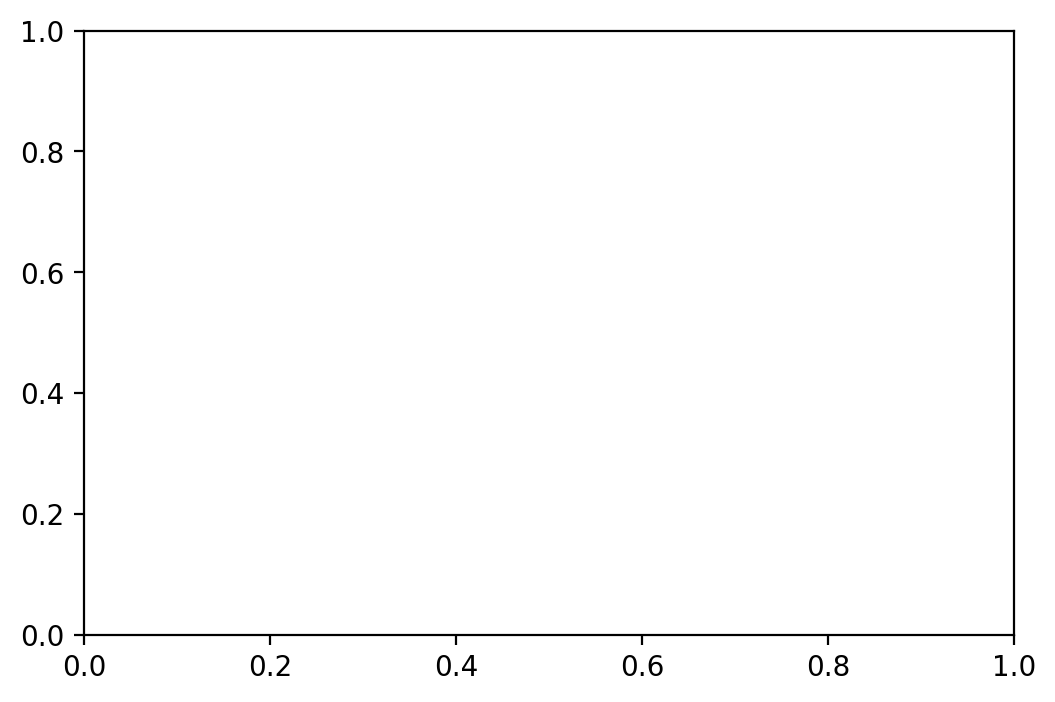

In [33]:
def animate(i,init=False):
    if init:
       
        cc = ax.pcolormesh(D[0].x1,D[0].x2,D[0].rho.T,edgecolors='face',lw=0.5,alpha=1.0)
        ax.set_xlabel('$x$ [au]')
        ax.set_ylabel('$y$ [au]')
        cb=plt.colorbar(cc,ax=ax);
        cb.set_label(r'$\rho_\mathrm{d}$ [g cm$^{-3}$]')
        
        return cc
    
    else:
        quad1 = ax.findobj(lambda o: type(o)==mpl.collections.QuadMesh)[0]
        quad1.set_array(D[i].rho.T.ravel())

        return quad1
    
mpl.rc('animation', html='html5')
f,ax = plt.subplots(1,1,figsize=(4,4))
anim = animation.FuncAnimation(f,animate,frames=len(files), init_func=lambda :animate(0,init=True), interval=100,blit=False,)
plt.close(f)
display(anim)

## Static plotting

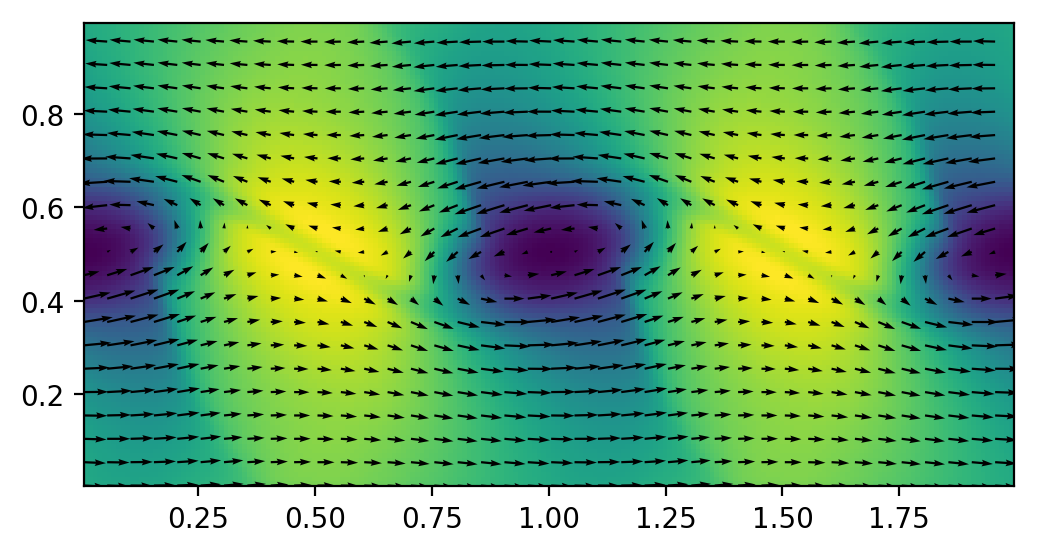

In [35]:
f,ax = plt.subplots()
ax.pcolormesh(D1.x1,D1.x2,D1.rho.T)
ax.set_aspect('equal');
q=5;
ax.quiver(D1.x1[::q],D1.x2[::q],D1.vx1[::q,::q].T,D1.vx2[::q,::q].T,scale=None)

In [36]:
f.savefig('fig.pdf');
!open fig.pdf